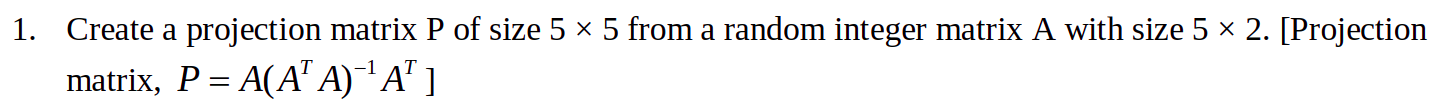

In [19]:
import numpy as np

A = np.random.randint(0, 10, (5, 2))
print("A matrix is: \n", A)
#P matrix dimensions are 5x5 and A matrix dimensions are 5x2 so we need to transpose A to get 2x5
P = np.dot(A, np.linalg.inv(np.dot(A.T, A)))
print("P matrix is: \n", P)

A matrix is: 
 [[1 0]
 [9 7]
 [9 0]
 [6 3]
 [1 7]]
P matrix is: 
 [[ 0.00783538 -0.00644405]
 [ 0.02541008  0.04452255]
 [ 0.07051845 -0.05799649]
 [ 0.02768014  0.00527241]
 [-0.03727299  0.09607499]]


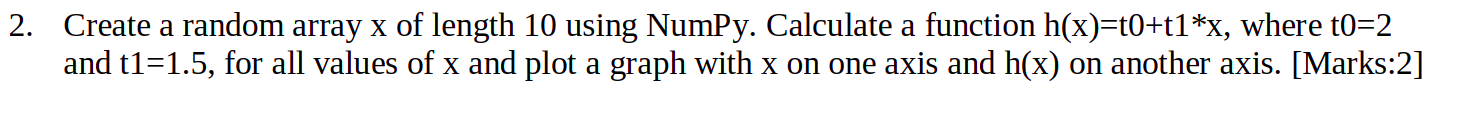

x matrix is: 
 [[6]
 [7]
 [7]
 [9]
 [8]]
h matrix is: 
 [[11. ]
 [12.5]
 [12.5]
 [15.5]
 [14. ]]


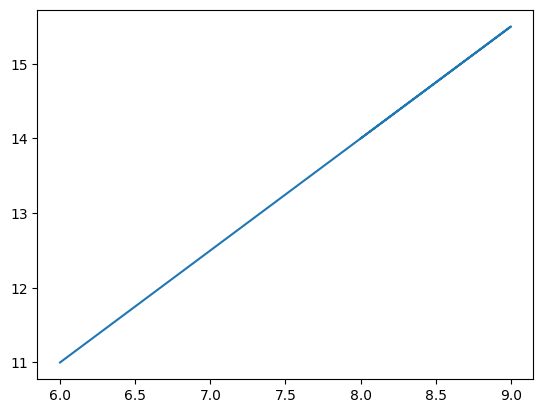

In [32]:
#an array with random numbers between 0 and 10
x = np.random.randint(0, 10, (5, 1))
print("x matrix is: \n", x)
to = 2
t1 = 1.5
h = to+np.dot(t1, x)
print("h matrix is: \n", h)

import matplotlib.pyplot as plt
plt.plot(x, h)


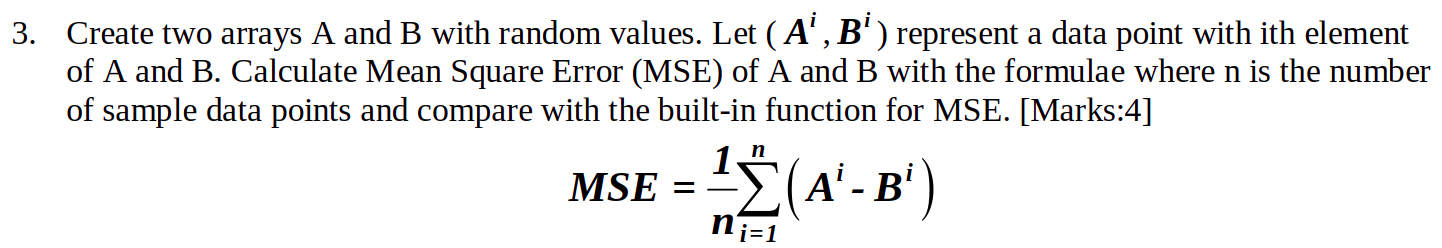

In [48]:
"""Create two arrays A and B with random values. Let (iA,iB) represent a data point with ith element of A and B. Calculate Mean Square Error (MSE) of A and B with the formulae where n is the number of sample data points and compare with the built-in function for MSE"""

import numpy as np
import matplotlib.pyplot as plt
import math

A = np.random.randint(0, 10, (5, 1))
B = np.random.randint(0, 10, (5, 1))

print("A matrix is: \n", A)
print("B matrix is: \n", B)

#Mean Square Error (MSE) of A and B with the formulae
def MSE(A, B):
    n = len(A)
    sum = 0
    for i in range(n):
        sum = sum + (A[i] - B[i])**2
    return sum/n

print("MSE of A and B is: ", MSE(A, B))


A matrix is: 
 [[9]
 [3]
 [1]
 [2]
 [5]]
B matrix is: 
 [[6]
 [1]
 [4]
 [1]
 [1]]
MSE of A and B is:  [7.8]


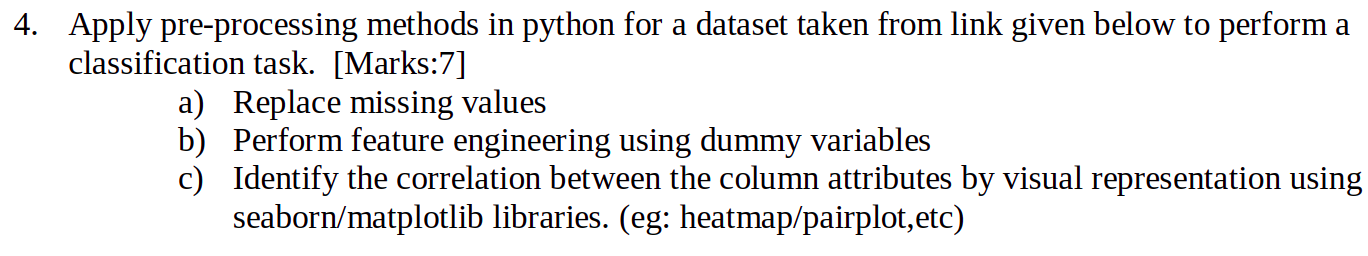

In [66]:
#importing dataset
import pandas as pd
dataset = pd.read_csv('Dropout_Academic Success - Sheet1.csv')
X = dataset.iloc[:, :-1].values #this is to get all the rows and all the columns except the last one as we want to predict the last column
y = dataset.iloc[:, 1].values #this is to get all the rows and only the last column as we want to predict the last column
dataset.shape

(4424, 37)

In [59]:
#replacing missing values 
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')#we use replace with mean because we have numerical data
imputer = imputer.fit(X[:, 1:3]) #this is to replace the missing values in the columns 1 and 2
X[:, 1:3] = imputer.transform(X[:, 1:3]) #this is to replace the missing values in the columns 1 and 2

#encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder_X = LabelEncoder() #labelencoder encodes the categorical data into numerical data
X[:, 0] = labelencoder_X.fit_transform(X[:, 0]) #this is to encode the first column 
ct = ColumnTransformer([('encoder', OneHotEncoder(), [0])], remainder='passthrough') #now ct is an object of the class ColumnTransformer which is used to encode the categorical data into numerical data, we use remainder = 'passthrough' because we want to keep the other columns as it is
X = np.array(ct.fit_transform(X), dtype=np.float64) #now we make X as an array of float64 type as the ct.fit_transform(X) returns an array of object type


In [60]:
#feature engineering using dummy variables
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y) #fit_transform is used to fit the labelencoder to the y and then transform it.

/tmp/ipykernel_117725/946740905.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr())


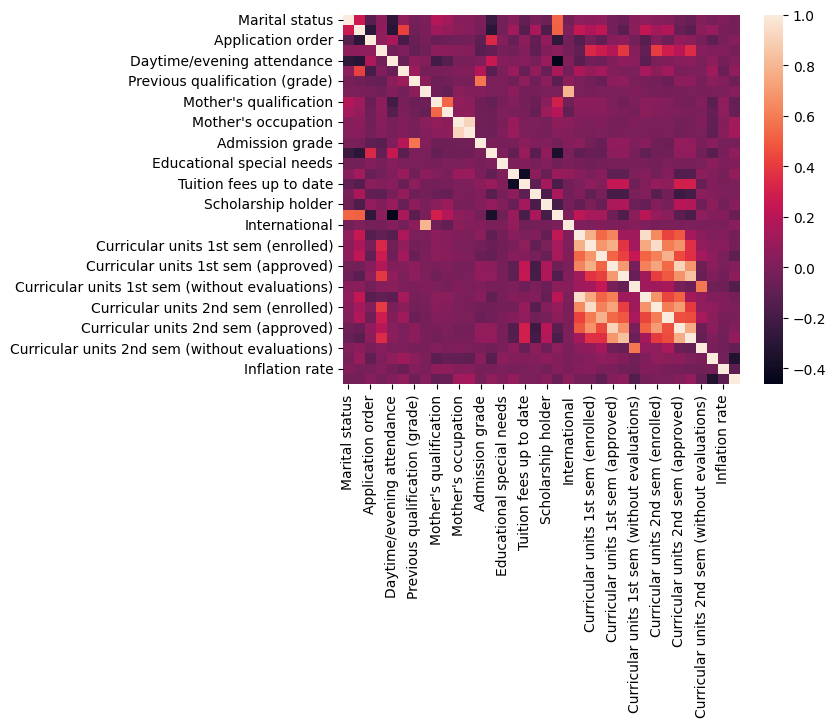

In [63]:
#correlation between column attributes
import seaborn as sns
sns.heatmap(dataset.corr())
sns.pairplot(dataset)